In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [43]:
# 1) choose a region (standard Mandelbrot view)
xmin, xmax = -3.5, -0.5
ymin, ymax = -1.5, 1.5
# 2) choose resolution (pixels)
width, height = 800, 800
# 3) build coordinate vectors
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
# 4) broadcast to a complex grid: shape (height, width)
C = x[None, :] + 1j * y[:, None]

In [44]:
C.shape

(800, 800)

In [71]:
max_iter = 200
escape_radius = 5.0

# start at z0 = 0 for every c
Z = np.ones_like(C, dtype=np.complex128)

# default: assume "inside" (never escapes), set to max_iter
escape_time = np.full(C.shape, max_iter, dtype=np.int32)

for k in range(max_iter):
    # still-active pixels (haven't escaped yet)
    active = np.abs(Z) <= escape_radius
    # iterate only active points
    Z[active] = Z[active]**2 + C[active]
    # Z[active] = (Z[active]**2) / (np.exp(Z[active]) + C[active])
    # newly escaped at this iteration
    escaped_now = active & (np.abs(Z) > escape_radius)
    escape_time[escaped_now] = k

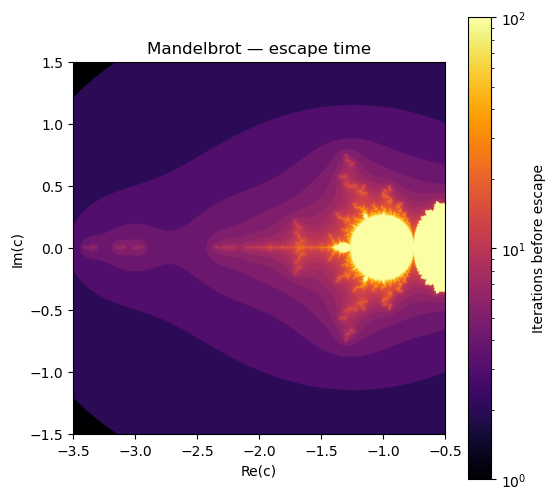

In [72]:
masked_escape = np.ma.masked_where(escape_time == max_iter, escape_time)

plt.figure(figsize=(6,6))
plt.imshow(escape_time, extent=(xmin, xmax, ymin, ymax),
           cmap='inferno', norm=LogNorm(vmin=1, vmax=100))
plt.colorbar(label='Iterations before escape')
plt.title('Mandelbrot — escape time')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()
